## Keşifçi Veri Analizi | Becerileri Pekiştirme

Aşağıda ihtiyacımız doğrultusunda kullanacağımız kütüphaneleri yükleyelim.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))

In [2]:
df = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")


Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [3]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [4]:
df.shape
#150 gozlem ve 5 oznitelikten oluşuyor.

(150, 5)

Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

Standart sapma ve ortalama değerlerden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

In [7]:
df.isna().sum()
#eksik değer bulunmuyor.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. Korelasyon katsayıları hakkında fikir yürütelim.

En güçlü pozitif ilişki hangi iki değişken arasındadır?

In [8]:
df.corr()
#en güçlü pozitif ilişki petal_width ve petal_length arasındadır.

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

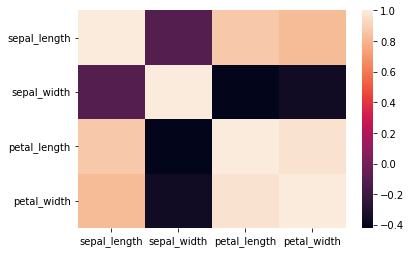

In [9]:
corr=df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values);

Veri çerçevemizin hedef değişkeninin "variety" benzersiz değerlerini görüntüleyelim.

In [10]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Veri çerçevemizin hedef değişkeninin "variety" benzersiz kaç adet değer içerdiğini görüntüleyelim.

In [11]:
df["species"].nunique()

3

Veri çerçevesindeki sepal.width ve sepal.length değişkenlerinin sürekli olduğunu görüyoruz. Bu iki sürekli veriyi görselleştirmek için önce scatterplot kullanalım.

Text(0.5, 1.0, 'Scatterplot')

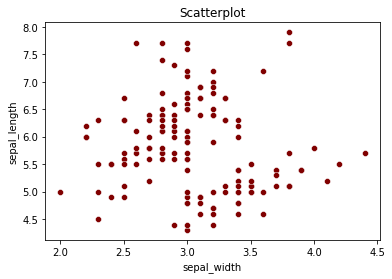

In [12]:
sns.scatterplot(x="sepal_width", y="sepal_length",data=df, color="maroon");
plt.title("Scatterplot")

Aynı iki veriyi daha farklı bir açıdan frekanslarıyla incelemek için jointplot kullanarak görselleştirelim. 

Text(0.5, 1.0, 'Jointplot')

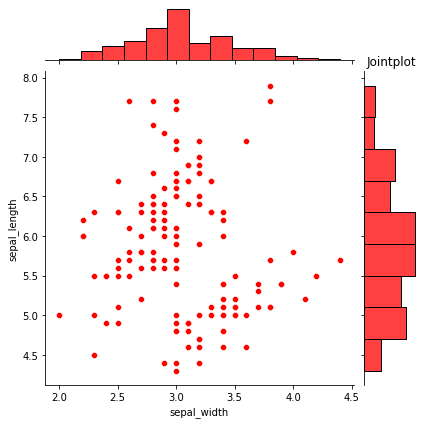

In [13]:
sns.jointplot(x="sepal_width", y="sepal_length",data=df,color="red")
plt.title("Jointplot")

Aynı iki veriyi scatterplot ile tekrardan görselleştirelim fakat bu sefer "variety" parametresi ile hedef değişkenine göre kırdıralım. 

3 farklı renk arasında sepal değişkenleriyle bir kümeleme yapılabilir mi? Ne kadar ayırt edilebilir bunun üzerine düşünelim.

Text(0.5, 1.0, 'Scatterplot')

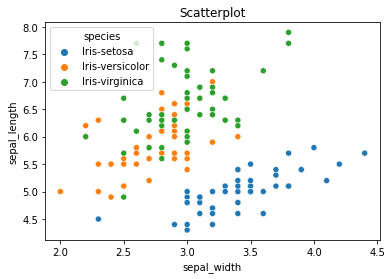

In [14]:
sns.scatterplot(x="sepal_width", y="sepal_length",hue="species" ,data=df)
plt.title("Scatterplot")

value_counts() fonksiyonu ile veri çerçevemizin ne kadar dengeli dağıldığını sorgulayalım. 

In [15]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Keman grafiği çizdirerek sepal.width değişkeninin dağılımını inceleyin. 

Söz konusu dağılım bizim için ne ifade ediyor, normal bir dağılım olduğunu söyleyebilir miyiz?

<AxesSubplot:ylabel='sepal_width'>

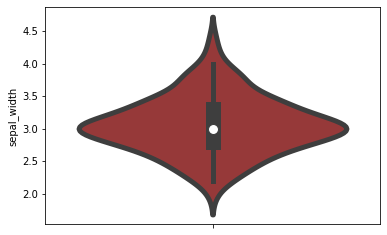

In [16]:
sns.violinplot(y="sepal_width", data=df, color="brown",linewidth=5)

Daha iyi anlayabilmek için sepal.width üzerine bir distplot çizdirelim.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

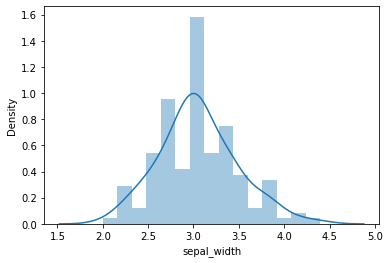

In [17]:
sns.distplot(df["sepal_width"], bins=15)

Üç çiçek türü için üç farklı keman grafiğini sepal.length değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

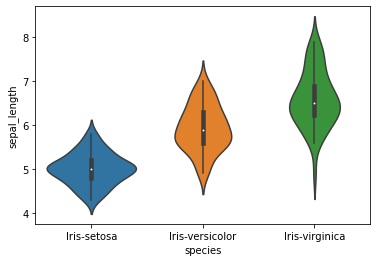

In [18]:
sns.violinplot(y="sepal_length", x="species",data=df)

Hangi çiçek türünden kaçar adet gözlem barındırıyor veri çerçevemiz?

50 x 3 olduğunu ve dengeli olduğunu value_counts ile zaten görmüştük, ancak bunu görsel olarak ifade etmek için sns.countplot() fonksiyonuna variety parametresini vereilm.

<AxesSubplot:xlabel='species', ylabel='count'>

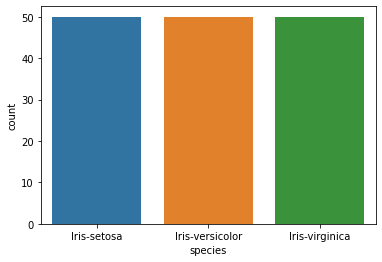

In [19]:
sns.countplot(x="species",data=df)

sepal.length ve sepal.width değişkenlerini sns.jointplot ile görselleştirelim, dağılımı ve dağılımın frekansı yüksek olduğu bölgelerini inceleyelim.

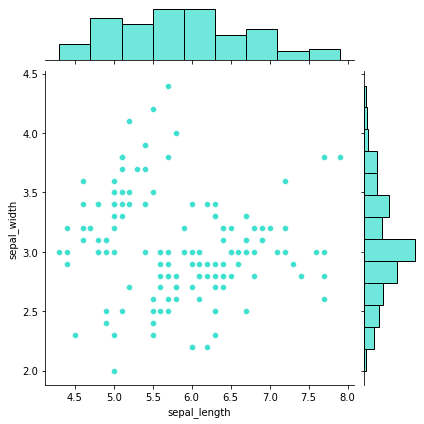

In [20]:
sns.jointplot(x="sepal_length", y="sepal_width", data=df,color="turquoise")

Bir önceki hücrede yapmış olduğumuz görselleştirmeye kind = "kde" parametresini ekleyelim. Böylelikle dağılımın noktalı gösterimden çıkıp yoğunluk odaklı bir görselleştirmeye dönüştüğünü görmüş olacağız.

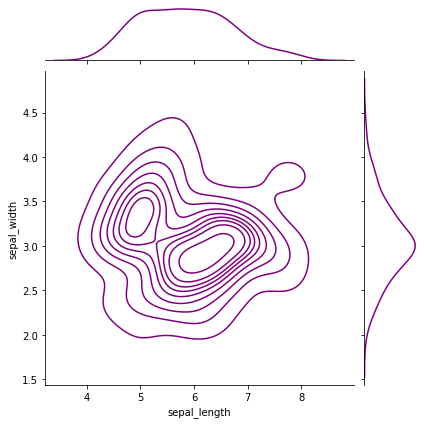

In [21]:
sns.jointplot(x="sepal_length", y="sepal_width", kind="kde" , data=df,color="purple")

scatterplot ile petal.length ve petal.width değişkenlerinin dağılımlarını çizdirelim.

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

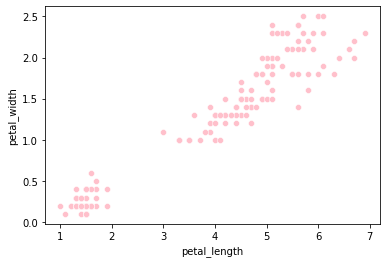

In [22]:
sns.scatterplot(x="petal_length" , y="petal_width" , data=df , color="pink")

Aynı görselleştirmeye hue = "variety" parametresini ekleyerek 3. bir boyut verelim.

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

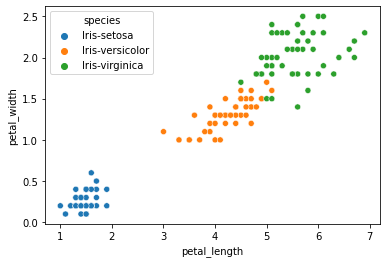

In [23]:
sns.scatterplot(x="petal_length" , y="petal_width" , data=df , hue="species")

sns.lmplot() görselleştirmesini petal.length ve petal.width değişkenleriyle implemente edelim. Petal length ile petal width arasında ne tür bir ilişki var ve bu ilişki güçlü müdür? sorusunu yanıtlayalım.

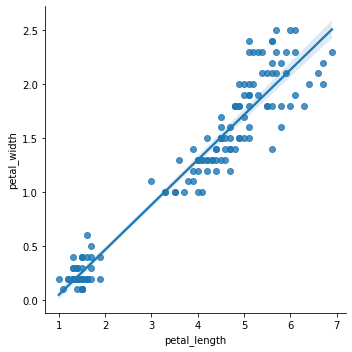

In [24]:
sns.lmplot(x="petal_length", y="petal_width",data=df)

Bu sorunun yanıtını pekiştirmek için iki değişken arasında korelasyon katsayısını yazdıralım. 

In [25]:
df.corr()["petal_length"] ["petal_width"]

0.9627570970509662

Petal Length ile Sepal Length değerlerini toplayarak yeni bir total length özniteliği oluşturalım.

In [26]:
df["total_length"]=df["petal_length"]+df["sepal_length"]
df["total_length"]

0       6.5
1       6.3
2       6.0
3       6.1
4       6.4
       ... 
145    11.9
146    11.3
147    11.7
148    11.6
149    11.0
Name: total_length, Length: 150, dtype: float64

total.length'in ortalama değerini yazdıralım. 

In [27]:
df["total_length"].mean()

9.602000000000004

total.length'in standart sapma değerini yazdıralım.

In [28]:
df["total_length"].std()

2.5191739884121978

sepal.length'in maksimum değerini yazdıralım.

In [29]:
df["sepal_length"].max()

7.9

sepal.length'i 5.5'den büyük ve türü setosa olan gözlemleri yazdıralım.

In [30]:
df[(df["sepal_length"]>5.5) & (df["species"]=="Iris-setosa")]

,sepal_length,sepal_width,petal_length,petal_width,species,total_length
14,5.8,4.0,1.2,0.2,Iris-setosa,7.0
15,5.7,4.4,1.5,0.4,Iris-setosa,7.2
18,5.7,3.8,1.7,0.3,Iris-setosa,7.4


petal.length'i 5'den küçük ve türü virginica olan gözlemlerin sadece sepal.length ve sepal.width değişkenlerini ve değerlerini yazdıralım.

In [31]:
df_filtered=df.query('petal_length < 5 & species=="Iris-virginica"')[["sepal_length","sepal_width"]]
df_filtered

,sepal_length,sepal_width
106,4.9,2.5
121,5.6,2.8
123,6.3,2.7
126,6.2,2.8
127,6.1,3.0
138,6.0,3.0


Hedef değişkenimiz variety'e göre bir gruplama işlemi yapalım değişken değerlerimizin ortalamasını görüntüleyelim.

In [32]:
df.groupby(["species"]).mean()

,sepal_length,sepal_width,petal_length,petal_width,total_length
species,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,6.470
Iris-versicolor,5.936,2.770,4.260,1.326,10.196
Iris-virginica,6.588,2.974,5.552,2.026,12.140


Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece petal.length değişkenimizin standart sapma değerlerini yazdıralım. 

In [33]:
df.groupby(["species"])["petal_length"].std()

species
Iris-setosa        0.173511
Iris-versicolor    0.469911
Iris-virginica     0.551895
Name: petal_length, dtype: float64

Emeğiniz, ayırdığınız vakit ve ilginiz için teşekkürler.

# BONUS

Hedef değişkenimizin variety'e göre gruplama işlemi yaparak sepal_length ve petal_length değişkenlerimizin medyan değerlerini bulalım.

In [34]:
df.groupby(["species"])["sepal_length","petal_length"].median()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,sepal_length,petal_length
species,,
Iris-setosa,5.0,1.50
Iris-versicolor,5.9,4.35
Iris-virginica,6.5,5.55


Sayısal değişkenler arasında kovaryans olup olmadığını göstermek için kovaryans matrisi çizdirelim.

In [35]:
df.cov()

,sepal_length,sepal_width,petal_length,petal_width,total_length
sepal_length,0.685694,-0.039268,1.273682,0.516904,1.959376
sepal_width,-0.039268,0.188004,-0.321713,-0.117981,-0.360981
petal_length,1.273682,-0.321713,3.113179,1.296387,4.386862
petal_width,0.516904,-0.117981,1.296387,0.582414,1.813291
total_length,1.959376,-0.360981,4.386862,1.813291,6.346238


Kovaryans katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

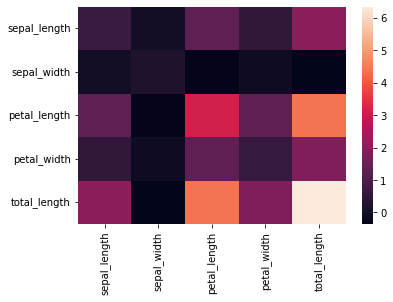

In [36]:
cov=df.cov()
sns.heatmap(cov,
           xticklabels=cov.columns.values,
           yticklabels=cov.columns.values);

Veri çerçevesinden rastgele bir gözlem görüntüleyelim.

In [37]:
df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species,total_length
146,6.3,2.5,5.0,1.9,Iris-virginica,11.3


Veri çerçevesinin son 3 gözlemini görüntüleyelim.

In [38]:
df.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species,total_length
147,6.5,3.0,5.2,2.0,Iris-virginica,11.7
148,6.2,3.4,5.4,2.3,Iris-virginica,11.6
149,5.9,3.0,5.1,1.8,Iris-virginica,11.0


sepal_length değişkeninin diğer değişkenlerle arasındaki korelasyon katsayılarını gösterelim.

In [39]:
corr2=df.corr().sepal_length.sort_values(ascending=False).index[0:5]
df[corr2].corr().sepal_length

sepal_length    1.000000
total_length    0.939279
petal_length    0.871754
petal_width     0.817954
sepal_width    -0.109369
Name: sepal_length, dtype: float64

sepal_width değişkeninin diğer değişkenlerle arasındaki kovaryans katsayılarını gösterelim.


In [40]:
cov2=df.cov().sepal_width.sort_values(ascending=False).index[0:5]
df[cov2].cov().sepal_width

sepal_width     0.188004
sepal_length   -0.039268
petal_width    -0.117981
petal_length   -0.321713
total_length   -0.360981
Name: sepal_width, dtype: float64

petal_length değişkeninin 0 ila 3 arasında olduğu değerleri filtreleyim.

In [41]:
petallength=df["petal_length"].between(0,3)
df[petallength]

,sepal_length,sepal_width,petal_length,petal_width,species,total_length
0,5.1,3.5,1.4,0.2,Iris-setosa,6.5
1,4.9,3.0,1.4,0.2,Iris-setosa,6.3
2,4.7,3.2,1.3,0.2,Iris-setosa,6.0
3,4.6,3.1,1.5,0.2,Iris-setosa,6.1
4,5.0,3.6,1.4,0.2,Iris-setosa,6.4
5,5.4,3.9,1.7,0.4,Iris-setosa,7.1
6,4.6,3.4,1.4,0.3,Iris-setosa,6.0
7,5.0,3.4,1.5,0.2,Iris-setosa,6.5
8,4.4,2.9,1.4,0.2,Iris-setosa,5.8
9,4.9,3.1,1.5,0.1,Iris-setosa,6.4
